### Trabalho 1

Seguem instruções:

1) Baixar dataset em : https://www.kaggle.com/c/home-credit-default-risk/data

2) Explorar, conforme instruções:

* 'application_train.csv': Esse csv possui 122 colunas: explorar 40 colunas, sendo as primeiras 30 obrigatórias e 10 adicionais a escolher
* 30 colunas obrigatórias:

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']
       
* alunos deverão se organizar para que todas as colunas sejam exploradas
* escolher dois arquivos, para exploração e join/merge/concat com o 'application_train.csv'

['HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']
 
3) objetivos:
* entendimento do problema de negócio
* carregamento do dataset
* identificação e tratamento de NaN
* exploração univariadaj, bivariada
* visualizações
* insights de negócio
* formatação do dataset para algoritmos de machine learning
* criação de features: agregação de dados, junção de dois ou mais dataframes

4) entregável: jupyter notebook. Não será necessário apresentação em powerpoint, nem relatório.

5) entrega limite: 8/agosto/2018 

6) trabalho individual. Haverá aplicação sistema anti-plágio nas submissões. (http://www.fgv.br/mailing/codigo-etica-conduta/24/)
   suspeitas de plágio estarão sujeitos a arguição oral de 5 mins por aluno no ultimo dia de aula (11/agosto/2018),

7) avaliação:
   - jupyter notebook e arguição (se houver)
   
### Problema de Negócio

##### Do Kaggle:
Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

##### Entendimento do problema:

Como fornecer crédito para pessoas com histórico insuficiente ou inexistente?

Utilizando estes dados alternativos, pode ser criado um modelo preditivo quer será usado para fazer uma análise das pessoas, para saber se elas tem um histórico de bom pagamento, e fornecer crédito para estas pessoas.

#### Importando as bibliotecas que serão utilizadas

In [140]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import missingno as mn

import seaborn as sns

In [141]:
pd.__version__

'0.23.3'

In [142]:
df = pd.read_csv('application_train.csv',index_col=0)

In [143]:
semente = 2701 #Data de aniversário
df40 = pd.concat([df.iloc[:,0:30], df.iloc[:,30:].sample(10,axis=1,random_state=semente)], axis=1 )

In [144]:
df40.shape

(307511, 40)

In [145]:
df40.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,DAYS_LAST_PHONE_CHANGE,LIVINGAPARTMENTS_MODE,LANDAREA_AVG,BASEMENTAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_9,EMERGENCYSTATE_MODE,FLOORSMAX_MODE,AMT_REQ_CREDIT_BUREAU_HOUR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,-1134.0,0.022,0.0369,0.0383,2.0,0,No,0.0833,0.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,-828.0,0.079,0.0130,0.0538,1.0,0,No,0.2917,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,-815.0,NaN,NaN,NaN,0.0,0,NaN,NaN,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,-617.0,NaN,NaN,NaN,2.0,0,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,-1106.0,NaN,NaN,NaN,0.0,0,NaN,NaN,0.0


In [146]:
df40.to_csv('application_train_40c.csv')

In [147]:
del df

In [148]:
df40 = pd.read_csv('application_train_40c.csv',index_col=0)

In [149]:
df40.shape

(307511, 40)

In [150]:
df40.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 40 columns):
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
NAME_TYPE_SUITE               306219 non-null object
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
REGION_POPULATION_RELATIVE    307511 non-null float64
DAYS_BIRTH                    307

#### Tratamento de NaNs

Temos algumas variáveis com Nans:

    AMT_ANNUITY                   307499 non-null float64
    AMT_GOODS_PRICE               307233 non-null float64
    NAME_TYPE_SUITE               306219 non-null object
    OWN_CAR_AGE                   104582 non-null float64
    OCCUPATION_TYPE               211120 non-null object
    CNT_FAM_MEMBERS               307509 non-null float64
    DAYS_LAST_PHONE_CHANGE        307510 non-null float64
    LIVINGAPARTMENTS_MODE         97312 non-null float64
    LANDAREA_AVG                  124921 non-null float64
    BASEMENTAREA_MODE             127568 non-null float64
    OBS_30_CNT_SOCIAL_CIRCLE      306490 non-null float64
    EMERGENCYSTATE_MODE           161756 non-null object
    FLOORSMAX_MODE                154491 non-null float64
    AMT_REQ_CREDIT_BUREAU_HOUR    265992 non-null float64


#### Verificando 
    AMT_ANNUITY                   307499 non-null float64

In [151]:
df40.AMT_ANNUITY.head()

SK_ID_CURR
100002    24700.5
100003    35698.5
100004     6750.0
100006    29686.5
100007    21865.5
Name: AMT_ANNUITY, dtype: float64

Substituo os 12 NaNs pela média destes números

In [152]:
df40.AMT_ANNUITY.fillna(df40.AMT_ANNUITY.mean(), inplace = True)

#### Verificando 
    AMT_GOODS_PRICE               307233 non-null float64

In [153]:
df40.AMT_GOODS_PRICE.head()

SK_ID_CURR
100002     351000.0
100003    1129500.0
100004     135000.0
100006     297000.0
100007     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

Substituo os 1292 NaNs pela média destes números

In [154]:
df40.AMT_GOODS_PRICE.fillna(df40.AMT_GOODS_PRICE.mean(), inplace = True)

#### Verificando 
    NAME_TYPE_SUITE               306219 non-null object

In [155]:
df40.NAME_TYPE_SUITE.head()

SK_ID_CURR
100002    Unaccompanied
100003           Family
100004    Unaccompanied
100006    Unaccompanied
100007    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [156]:
set(df40.NAME_TYPE_SUITE)

{'Children',
 'Family',
 'Group of people',
 'Other_A',
 'Other_B',
 'Spouse, partner',
 'Unaccompanied',
 nan}

Por serem valores alfanuméricos, substituo os NaN por 'Unknown' 

In [157]:
df40.NAME_TYPE_SUITE.fillna('Unknown', inplace = True)

In [158]:
set(df40.NAME_TYPE_SUITE)

{'Children',
 'Family',
 'Group of people',
 'Other_A',
 'Other_B',
 'Spouse, partner',
 'Unaccompanied',
 'Unknown'}

#### Verificando 
    OWN_CAR_AGE                   104582 non-null float64
    
Neste caso temos duas variáveis relacionadas
    OWN_CAR_AGE
e
    FLAG_OWN_CAR
    
Se a pessoa não possui carro (FLAG_OWN_CAR = N), então faz sentido o OWN_CAR_AGE ser igual a NaN

In [159]:
df40[['FLAG_OWN_CAR','OWN_CAR_AGE']].describe

<bound method NDFrame.describe of            FLAG_OWN_CAR  OWN_CAR_AGE
SK_ID_CURR                          
100002                N          NaN
100003                N          NaN
100004                Y         26.0
100006                N          NaN
100007                N          NaN
100008                N          NaN
100009                Y         17.0
100010                Y          8.0
100011                N          NaN
100012                N          NaN
100014                N          NaN
100015                N          NaN
100016                N          NaN
100017                Y         23.0
100018                N          NaN
100019                Y         17.0
100020                N          NaN
100021                N          NaN
100022                N          NaN
100023                N          NaN
100024                Y          7.0
100025                Y         14.0
100026                N          NaN
100027                N          NaN
1000

Com o resultado acima, confirmamos que OWN_CAR_AGE é NaN quando FLAG_OWN_CAR = N. Vamos atribuir o valor -1 para estes casos

In [160]:
df40.OWN_CAR_AGE.fillna(-1, inplace = True)

In [161]:
df40.OWN_CAR_AGE.head()

SK_ID_CURR
100002    -1.0
100003    -1.0
100004    26.0
100006    -1.0
100007    -1.0
Name: OWN_CAR_AGE, dtype: float64

#### Verificando 
    OCCUPATION_TYPE               211120 non-null object

In [162]:
df40.OCCUPATION_TYPE.head()

SK_ID_CURR
100002      Laborers
100003    Core staff
100004      Laborers
100006      Laborers
100007    Core staff
Name: OCCUPATION_TYPE, dtype: object

In [163]:
df40.OCCUPATION_TYPE.fillna('Unknown', inplace = True)

#### Verificando 
    CNT_FAM_MEMBERS               307509 non-null float64

In [164]:
df40.CNT_FAM_MEMBERS.head()

SK_ID_CURR
100002    1.0
100003    2.0
100004    1.0
100006    2.0
100007    1.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [165]:
set(df40.CNT_FAM_MEMBERS)

{nan,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 nan,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 20.0}

Existem 3 variáveis relativas a família: 'CNT_CHILDREN','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS'. Vamos ver como podemos subtituir os NaNs de CNT_FAM_MEMBERS: 

In [167]:
#pd.isnull(df40).any(1).nonzero()[0]
df40[pd.isnull(df40['CNT_FAM_MEMBERS'])]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,DAYS_LAST_PHONE_CHANGE,LIVINGAPARTMENTS_MODE,LANDAREA_AVG,BASEMENTAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_9,EMERGENCYSTATE_MODE,FLOORSMAX_MODE,AMT_REQ_CREDIT_BUREAU_HOUR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,538396.207429,...,0,-876.0,NaN,NaN,NaN,3.0,0,NaN,NaN,NaN
317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,538396.207429,...,0,-654.0,0.0918,NaN,0.0485,1.0,0,No,0.375,0.0


In [171]:
df40.loc[[148605],['CNT_CHILDREN','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS']]

,CNT_CHILDREN,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS
SK_ID_CURR,,,
148605,0,Unknown,NaN


In [172]:
df40.loc[[317181],['CNT_CHILDREN','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS']]

,CNT_CHILDREN,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS
SK_ID_CURR,,,
317181,0,Unknown,NaN


Como estes valores não podem ser encontrados, vamos passar para a próxima veriável e apagamos os NaNs que sobrarem antes de transformar o dataframe em um dataframe com dummies, para podermos montar as correlações.

#### Verificando 
    LIVINGAPARTMENTS_MODE         97312 non-null float64

In [173]:
df40.LIVINGAPARTMENTS_MODE.head()

SK_ID_CURR
100002    0.022
100003    0.079
100004      NaN
100006      NaN
100007      NaN
Name: LIVINGAPARTMENTS_MODE, dtype: float64

Verificando se existe relação com as outras variáveis relativas a imóvel:

    FLAG_OWN_REALTY               307511 non-null object
    LANDAREA_AVG                  124921 non-null float64
    BASEMENTAREA_MODE             127568 non-null float64
    EMERGENCYSTATE_MODE           161756 non-null object
    FLOORSMAX_MODE                154491 non-null float64

In [174]:
df40[['LIVINGAPARTMENTS_MODE','FLAG_OWN_REALTY','LANDAREA_AVG','BASEMENTAREA_MODE','EMERGENCYSTATE_MODE','FLOORSMAX_MODE']].head(30)

,LIVINGAPARTMENTS_MODE,FLAG_OWN_REALTY,LANDAREA_AVG,BASEMENTAREA_MODE,EMERGENCYSTATE_MODE,FLOORSMAX_MODE
SK_ID_CURR,,,,,,
100002,0.0220,Y,0.0369,0.0383,No,0.0833
100003,0.0790,N,0.0130,0.0538,No,0.2917
100004,NaN,Y,NaN,NaN,NaN,NaN
100006,NaN,Y,NaN,NaN,NaN,NaN
100007,NaN,Y,NaN,NaN,NaN,NaN
100008,NaN,Y,NaN,NaN,NaN,NaN
100009,NaN,Y,NaN,NaN,NaN,NaN
100010,NaN,Y,NaN,NaN,NaN,NaN
100011,NaN,Y,NaN,NaN,NaN,NaN


Aparentemente existe uma relação entre as variáveis:

    LIVINGAPARTMENTS_MODE         97312 non-null float64
    LANDAREA_AVG                  124921 non-null float64
    BASEMENTAREA_MODE             127568 non-null float64
    EMERGENCYSTATE_MODE           161756 non-null object
    FLOORSMAX_MODE                154491 non-null float64
    
Porém não existe com a variável FLAG_OWN_REALTY.

Como são muitos valores faltantes, para não impactar o modelo os NaNs das colunas serão substituídos por suas médias. 

Para a coluna EMERGENCYSTATE_MODE será usada uma outra estratégia.

In [175]:
df40.LIVINGAPARTMENTS_MODE.fillna(df40.LIVINGAPARTMENTS_MODE.mean(), inplace = True)

In [176]:
df40.LANDAREA_AVG.fillna(df40.LANDAREA_AVG.mean(), inplace = True)

In [177]:
df40.BASEMENTAREA_MODE.fillna(df40.BASEMENTAREA_MODE.mean(), inplace = True)

In [178]:
df40.FLOORSMAX_MODE.fillna(df40.FLOORSMAX_MODE.mean(), inplace = True)

Para EMERGENCYSTATE_MODE será necessário um outro tratamento, já que esta variável é um objeto, não um número. Por isso, vamos usar somente os valores 1 e 0, para substituir o Y e o N em duas outras variáveis

In [179]:
df40['EMERGENCYSTATE_MODE_N'] = np.nan
df40.EMERGENCYSTATE_MODE_N.loc[df40.EMERGENCYSTATE_MODE == 'No'] = 1
df40.EMERGENCYSTATE_MODE_N.loc[df40.EMERGENCYSTATE_MODE != 'No'] = 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [180]:
df40['EMERGENCYSTATE_MODE_Y'] = np.nan
df40.EMERGENCYSTATE_MODE_Y.loc[df40.EMERGENCYSTATE_MODE == 'Yes'] = 1
df40.EMERGENCYSTATE_MODE_Y.loc[df40.EMERGENCYSTATE_MODE != 'Yes'] = 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [181]:
df40.drop(['EMERGENCYSTATE_MODE'],axis=1,inplace=True)

#### Verificando 
    OBS_30_CNT_SOCIAL_CIRCLE      306490 non-null float64

In [182]:
df40.OBS_30_CNT_SOCIAL_CIRCLE.head()

SK_ID_CURR
100002    2.0
100003    1.0
100004    0.0
100006    2.0
100007    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [183]:
set(df40.OBS_30_CNT_SOCIAL_CIRCLE)

{0.0,
 1.0,
 2.0,
 nan,
 4.0,
 3.0,
 6.0,
 7.0,
 8.0,
 5.0,
 10.0,
 9.0,
 12.0,
 13.0,
 nan,
 nan,
 11.0,
 14.0,
 16.0,
 15.0,
 17.0,
 20.0,
 22.0,
 19.0,
 18.0,
 25.0,
 21.0,
 24.0,
 23.0,
 28.0,
 26.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 47.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 27.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 29.0,
 nan,
 nan,
 nan,
 nan,
 30.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,


Para evitar ruídos na interpretação, os registros NaN serão substituídos pela média, já que foram observados valores 0, que poderiam equivaler ao NaN nos registros.

In [184]:
df40.OBS_30_CNT_SOCIAL_CIRCLE.fillna(df40.OBS_30_CNT_SOCIAL_CIRCLE.mean(), inplace = True)

#### Verificando 
    AMT_REQ_CREDIT_BUREAU_HOUR    265992 non-null float64

In [185]:
df40.AMT_REQ_CREDIT_BUREAU_HOUR.head()

SK_ID_CURR
100002    0.0
100003    0.0
100004    0.0
100006    NaN
100007    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

Mesmo caso da variável OBS_30_CNT_SOCIAL_CIRCLE: para evitar ruídos na interpretação, os registros NaN serão substituídos pela média, já que foram observados valores 0, que poderiam equivaler ao NaN nos registros.

In [186]:
df40.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df40.AMT_REQ_CREDIT_BUREAU_HOUR.mean(), inplace = True)

#### Verificando 
    DAYS_LAST_PHONE_CHANGE        307510 non-null float64

In [187]:
df40.DAYS_LAST_PHONE_CHANGE.head()

SK_ID_CURR
100002   -1134.0
100003    -828.0
100004    -815.0
100006    -617.0
100007   -1106.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

Uma simples ocorrência de NaN, por se tratar de valor numérico, será substituído pela média.

In [188]:
df40.DAYS_LAST_PHONE_CHANGE.fillna(df40.DAYS_LAST_PHONE_CHANGE.mean(), inplace = True)

Confirmando que não existem mais NaNs no dataframe

In [189]:
df40.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 41 columns):
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307511 non-null float64
AMT_GOODS_PRICE               307511 non-null float64
NAME_TYPE_SUITE               307511 non-null object
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
REGION_POPULATION_RELATIVE    307511 non-null float64
DAYS_BIRTH                    307

Como esperado, ainda faltam 2 NaNs:
    CNT_FAM_MEMBERS               307509 non-null float64
    
Vamos apagar as linhas com estes valores.

In [191]:
df40.dropna().shape

(307509, 41)

Confirmando que somente 2 linhas foram deletadas e fazemos na tabela

In [192]:
df40.dropna(inplace=True)

In [193]:
df40.to_csv('application_train_40c2.csv')

Iniciamos o tratamento de dummies, primeiro carregando novamente a tabela e em seguida criando um novo dataframe de dummies

In [194]:
df40 = pd.read_csv('application_train_40c2.csv', index_col=0)

Criamos um dataframe com os dummies

In [195]:
df40a = pd.get_dummies(df40)

In [196]:
df40a.shape

(307509, 91)

Como os valores foram convertidos, novas colunas são criadas, a seguir vemos a estrutura do dataframe

In [197]:
df40a.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 100002 to 456255
Data columns (total 91 columns):
TARGET                                               307509 non-null int64
CNT_CHILDREN                                         307509 non-null int64
AMT_INCOME_TOTAL                                     307509 non-null float64
AMT_CREDIT                                           307509 non-null float64
AMT_ANNUITY                                          307509 non-null float64
AMT_GOODS_PRICE                                      307509 non-null float64
REGION_POPULATION_RELATIVE                           307509 non-null float64
DAYS_BIRTH                                           307509 non-null int64
DAYS_EMPLOYED                                        307509 non-null int64
DAYS_REGISTRATION                                    307509 non-null float64
DAYS_ID_PUBLISH                                      307509 non-null int64
OWN_CAR_AGE                                    

Imprimindo as correlações

In [198]:
df40a.corr()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff
TARGET,1.000000,0.019186,-0.003981,-0.030369,-0.012816,-0.039628,-0.037227,0.078241,-0.044933,0.041976,...,0.027591,-0.018645,-0.008515,-0.005047,-0.000394,0.019537,-0.002452,0.014648,-0.038691,0.007802
CNT_CHILDREN,0.019186,1.000000,0.012885,0.002146,0.021375,-0.001826,-0.025572,0.330942,-0.239820,0.183399,...,0.004935,0.035003,0.019643,0.012564,0.006459,0.040247,0.009265,-0.008440,-0.175991,0.003259
AMT_INCOME_TOTAL,-0.003981,0.012885,1.000000,0.156870,0.191656,0.159601,0.074797,0.027257,-0.064222,0.027803,...,-0.012418,0.105489,-0.013602,0.005325,0.005468,-0.023748,-0.002273,-0.012062,-0.043544,-0.006863
AMT_CREDIT,-0.030369,0.002146,0.156870,1.000000,0.770127,0.986588,0.099738,-0.055436,-0.066838,0.009621,...,-0.028910,0.119548,0.003529,0.007332,0.006915,-0.030339,-0.000893,-0.015578,-0.041460,-0.017735
AMT_ANNUITY,-0.012816,0.021375,0.191656,0.770127,1.000000,0.774661,0.118424,0.009444,-0.104331,0.038512,...,-0.022121,0.146184,-0.014408,0.013856,0.010652,-0.023036,-0.001149,-0.021068,-0.069903,-0.013056
AMT_GOODS_PRICE,-0.039628,-0.001826,0.159601,0.986588,0.774661,1.000000,0.103482,-0.053416,-0.064826,0.011561,...,-0.031331,0.126882,0.001040,0.007059,0.006543,-0.031279,-0.000809,-0.018242,-0.039169,-0.017850
REGION_POPULATION_RELATIVE,-0.037227,-0.025572,0.074797,0.099738,0.118424,0.103482,1.000000,-0.029583,-0.003979,-0.053822,...,-0.009563,0.030222,-0.013389,0.009707,0.003123,-0.022712,0.007291,-0.013490,0.017411,-0.004974
DAYS_BIRTH,0.078241,0.330942,0.027257,-0.055436,0.009444,-0.053416,-0.029583,1.000000,-0.615864,0.331910,...,0.034514,0.041441,0.018438,0.038386,0.023341,0.156950,0.030552,-0.016987,-0.431882,0.045354
DAYS_EMPLOYED,-0.044933,-0.239820,-0.064222,-0.066838,-0.104331,-0.064826,-0.003979,-0.615864,1.000000,-0.210240,...,-0.038369,-0.128782,-0.080816,-0.043608,-0.022975,-0.158336,-0.030694,-0.069537,0.693370,-0.030853
DAYS_REGISTRATION,0.041976,0.183399,0.027803,0.009621,0.038512,0.011561,-0.053822,0.331910,-0.210240,1.000000,...,0.008048,0.044287,0.003273,0.019382,0.013896,0.042791,0.007814,-0.007862,-0.151509,0.007246


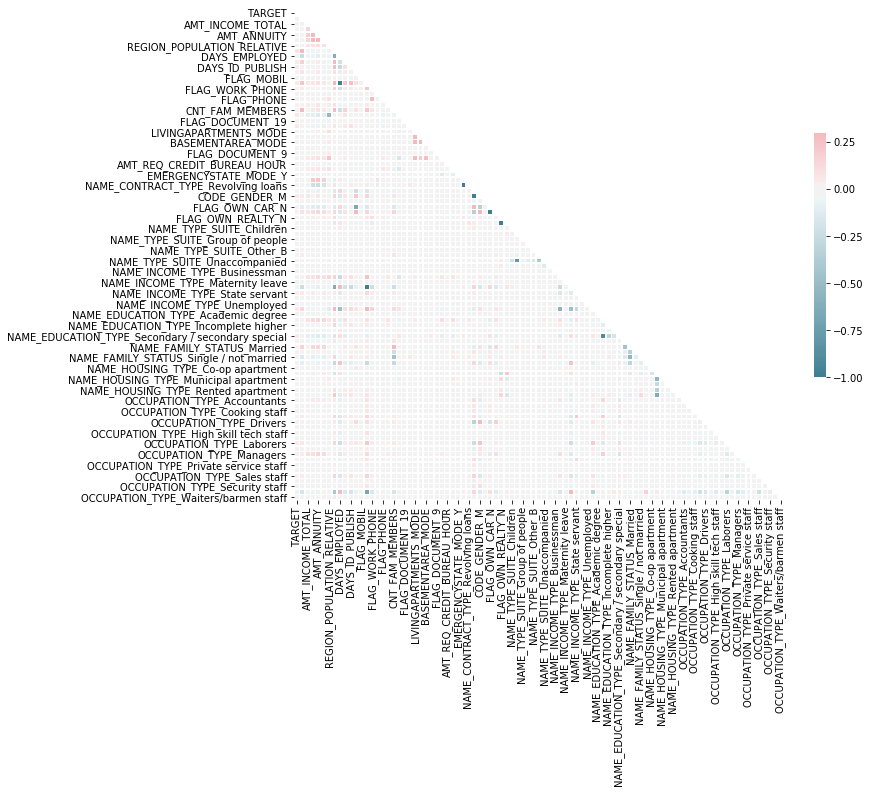

In [199]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df40a.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df40a.corr().round(2), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})